In [5]:
!sudo apt-get install libpcap-dev
!pip install python-libpcap
!pip install pcap-handler
!pip install scapy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libpcap-dev is already the newest version (1.10.1-4build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444328 sha256=dddc45e3e0abdaf6156c8a83daa773edbc35b57f76bd4454b5a5f8a7ea88abc8
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [ ]:
from pylibpcap.pcap import rpcap

for len, t, pkt in rpcap("tests/dns.pcap"):
    print("Buf length:", len)
    print("Time:", t)
    print("Buf:", pkt)

In [6]:
from pcap_handler import *
pcap2df = pcapHandler(file="/content/infashion_node_network.pcap", verbose=True)
df = pcap2df.to_DF(head=True)

Reading file...
Testing file...
File is verified!
Extracting data from pcap file...
Making a dataframe (df)
  version ihl tos  len     id flags frag  ttl proto chksum  ... dataofs  \
0       4   5   0  150  16137    DF    0  128     6  14226  ...       5   
1       4   5   0  150  16137    DF    0  128     6  14226  ...       5   
2       4   5   0  150  30380    DF    0   64     6  16367  ...       5   
3       4   5   0   40  16138    DF    0  128     6  14335  ...       5   
4       4   5   0   40  16138    DF    0  128     6  14335  ...       5   

  reserved flags window chksum urgptr options payload  \
0        0    PA    253  19769      0       0     110   
1        0    PA    253  19769      0       0     110   
2        0    PA    507  18295      0       0     110   
3        0     A    253   4357      0    None       0   
4        0     A    253   4357      0    None       0   

                                         payload_raw  \
0  b'\x17\x03\x03\x00ia]-H\x06t\xa0.\x93\x

In [13]:
columns_to_keep = ['src', 'dst', 'sport', 'dport', 'ack', 'payload', 'payload_raw']

# Select only the desired columns
filtered_df = df[columns_to_keep]
filtered_df

,src,dst,sport,dport,ack,payload,payload_raw
0,192.168.1.62,192.168.1.56,49312,8009,1925886037,110,b'\x17\x03\x03\x00ia]-H\x06t\xa0.\x93\x0b\xb0\...
1,192.168.1.62,192.168.1.56,49312,8009,1925886037,110,b'\x17\x03\x03\x00ia]-H\x06t\xa0.\x93\x0b\xb0\...
2,192.168.1.56,192.168.1.62,8009,49312,3606658970,110,b'\x17\x03\x03\x00i\xea\x9cY\x1dR\xb2\xcc\xd2\...
3,192.168.1.62,192.168.1.56,49312,8009,1925886147,0,b''
4,192.168.1.62,192.168.1.56,49312,8009,1925886147,0,b''
...,...,...,...,...,...,...,...
5854,192.168.1.62,192.168.1.93,49313,8009,19499887,0,b''
5855,192.168.1.62,192.168.1.93,49313,8009,19499887,0,b''
5856,192.168.1.41,192.168.1.62,45018,80,3227866573,0,b''
5857,192.168.1.62,192.168.1.41,80,45018,3747875585,0,b''


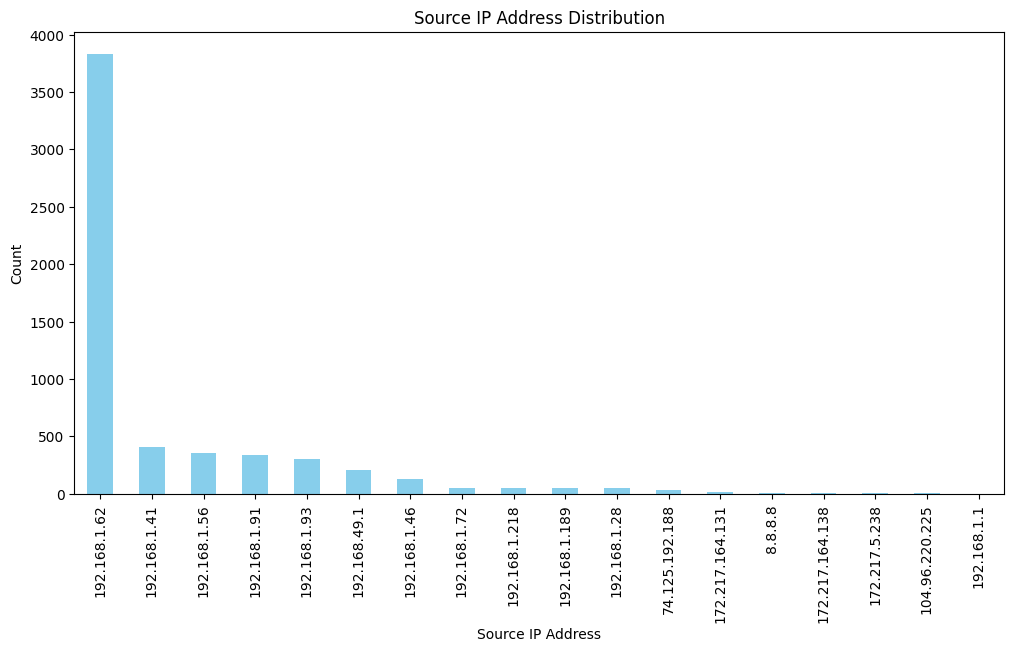

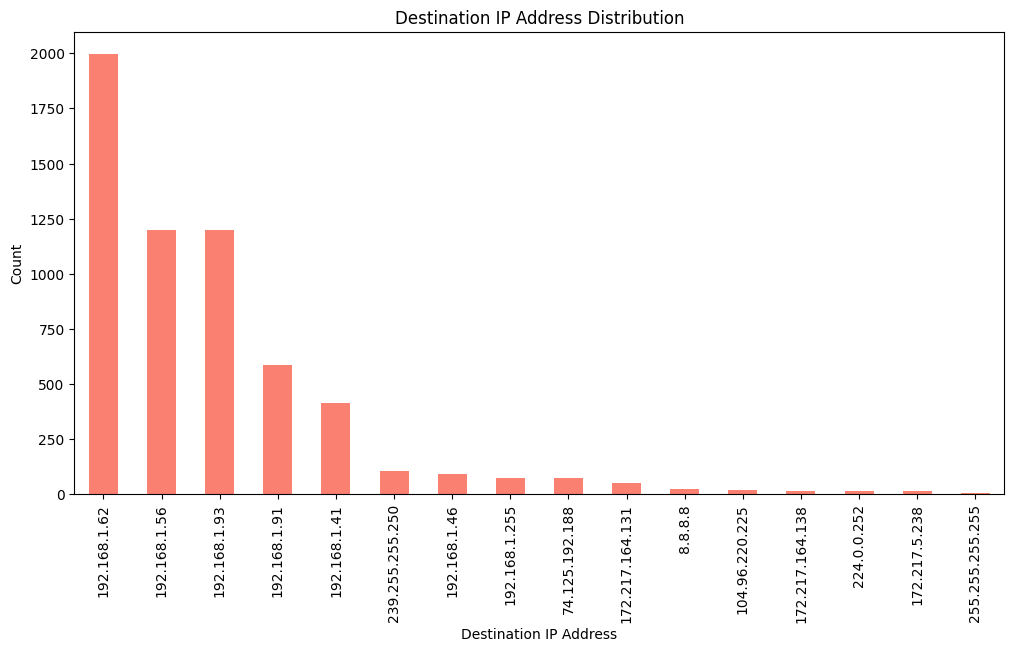

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'src' and 'dst' columns

# Count the occurrences of each unique source IP address
src_ip_counts = df['src'].value_counts()

# Count the occurrences of each unique destination IP address
dst_ip_counts = df['dst'].value_counts()

# Plotting source IP addresses
plt.figure(figsize=(12, 6))
src_ip_counts.plot(kind='bar', color='skyblue')
plt.title('Source IP Address Distribution')
plt.xlabel('Source IP Address')
plt.ylabel('Count')
plt.show()

# Plotting destination IP addresses
plt.figure(figsize=(12, 6))
dst_ip_counts.plot(kind='bar', color='salmon')
plt.title('Destination IP Address Distribution')
plt.xlabel('Destination IP Address')
plt.ylabel('Count')
plt.show()

In [23]:
import pandas as pd
import ipaddress

# Assuming 'df' is your DataFrame with 'src' and 'dst' columns

# Function to check if an IP address is local
def is_local(ip):
    try:
        ip_obj = ipaddress.ip_address(ip)
        return ip_obj.is_private
    except ValueError:
        return False

# Filter out local source and destination IP addresses
df_filtered = filtered_df[~filtered_df['src'].apply(is_local)]

df_filtered

,src,dst,sport,dport,ack,payload,payload_raw
74,74.125.192.188,192.168.1.62,5228,49310,2775702334,0,b''
285,74.125.192.188,192.168.1.62,5228,49310,2775702334,0,b''
375,74.125.192.188,192.168.1.62,5228,49310,2775702334,0,b''
512,74.125.192.188,192.168.1.62,5228,49310,2775702334,0,b''
679,74.125.192.188,192.168.1.62,5228,49310,2775702334,0,b''
...,...,...,...,...,...,...,...
5455,104.96.220.225,192.168.1.62,80,49592,1308989546,997,b'HTTP/1.1 200 OK\r\nContent-Length: 555\r\nCo...
5482,104.96.220.225,192.168.1.62,80,49592,1308989689,948,b'HTTP/1.1 200 OK\r\nContent-Length: 506\r\nCo...
5574,74.125.192.188,192.168.1.62,5228,49310,2775702386,0,b''
5575,74.125.192.188,192.168.1.62,5228,49310,2775702386,26,b'\x17\x03\x03\x00\x15\x08C\xd3p\xeb\xcd\xe5b\...


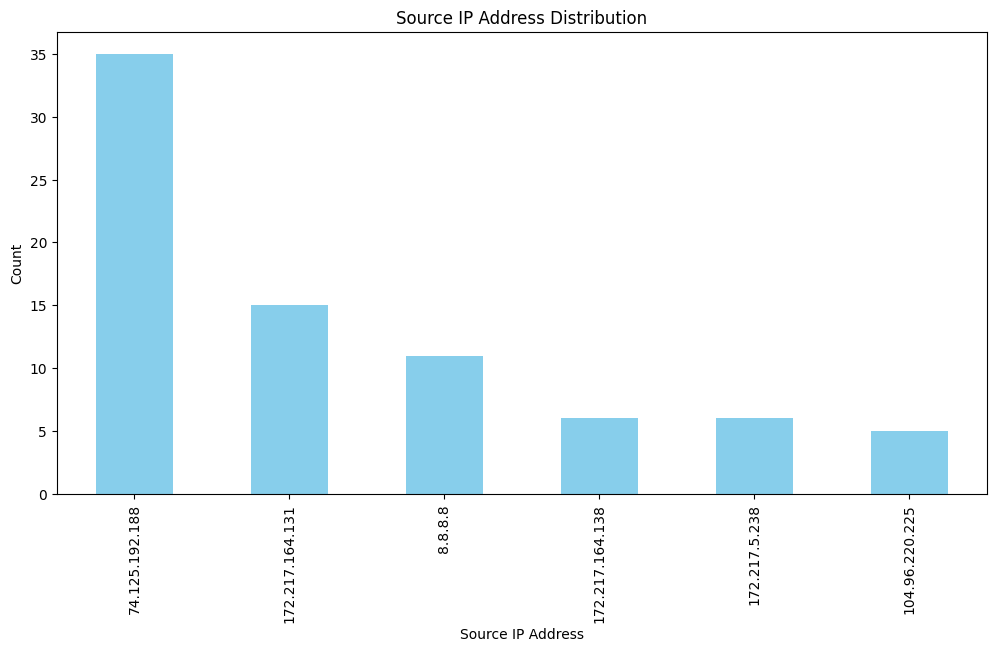

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'src' and 'dst' columns

# Count the occurrences of each unique source IP address
src_ip_counts = df_filtered['src'].value_counts()

# Count the occurrences of each unique destination IP address
dst_ip_counts = df_filtered['dst'].value_counts()

# Plotting source IP addresses
plt.figure(figsize=(12, 6))
src_ip_counts.plot(kind='bar', color='skyblue')
plt.title('Source IP Address Distribution')
plt.xlabel('Source IP Address')
plt.ylabel('Count')
plt.show()
